### Mapping violence towards foreigners

Here I will aim to map violence towards foreigners across the Gauteng region


In [1]:
# Importing all packages that will be necessary for the data exploration 

# Importing the pandas library 
import pandas as pd

#For creating or removing a directory folder
import os

#To allow me to work with numerical data
import numpy as np

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Importing relevant files

In [2]:
qol17=pd.read_csv('qols-v-2017-2018-week5.csv')
wards_shp=gpd.read_file("MDB_Wards_2020.shp")

I have to rename the ward columns so I can merge the two files

In [3]:
qol17=qol17.rename(columns={"ward":"WardID"})

I have to ensure that they are in the same format. i.e. both integer

In [4]:
wards_shp['WardID'] = wards_shp['WardID'].astype(int)

Now I merge them together on the WardID column

In [5]:
wards_mer = wards_shp.merge(qol17, on='WardID')

I want to specifically map the variable: Violence towards foreigners. I first look at the data through value_counts.

In [6]:
violence_foreigners = wards_mer['Q9_07_foreigners'].value_counts()

In [7]:
violence_foreigners

Disagree                      13385
Strongly disagree              8619
Agree                          1476
Neither agree nor disagree      931
Strongly agree                  478
Name: Q9_07_foreigners, dtype: int64

Through the loc function I can code the string values against numerical values. This will allow me to later take the mean

In [8]:
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Strongly disagree','violence_foreigners']=4
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Disagree','violence_foreigners']=3
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Neither agree nor disagree','violence_foreigners']=2
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Agree','violence_foreigners']=1
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Strongly agree','violence_foreigners']=0
wards_mer [['Q9_07_foreigners','violence_foreigners']]

,Q9_07_foreigners,violence_foreigners
0,Strongly disagree,4.0
1,Strongly disagree,4.0
2,Neither agree nor disagree,2.0
3,Strongly disagree,4.0
4,Disagree,3.0
...,...,...
24884,Disagree,3.0
24885,Disagree,3.0
24886,Neither agree nor disagree,2.0
24887,Disagree,3.0


I then create a ward level dataset with the mean for wards_mer_foreigners variable.


In [9]:
#create ward level dataset with ward average wards_mer_foreigners variable
wards_mer_foreigners = wards_mer.groupby("WardID").mean('violence_foreigners') [["violence_foreigners"]]

# check ward level trust var
wards_mer_foreigners.head()

# merge ward level trust var back to ward level shape data (again)

wards_mer_foreigners = wards_mer.merge(wards_mer_foreigners, on='WardID')

wards_mer_foreigners.head()

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_20_Interracial_dating,Q11_14_unemployment_status,Q12_03_day,Q12_04_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income,violence_foreigners_x,violence_foreigners_y
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Agree,NaN,Bit unsafe,Very unsafe,35,35-39,No,R1 601 - R3 200,4.0,3.0
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Agree,Yes,Very unsafe,Very unsafe,28,25-29,No,R6 401 - R12 800,4.0,3.0
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Neither agree nor disagree,No,Fairly safe,Bit unsafe,62,60-64,No,R1 601 - R3 200,2.0,3.0
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Agree,NaN,Neither safe nor unsafe,Very unsafe,25,25-29,No,R3 201 - R6 400,4.0,3.0
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Disagree,Yes,Fairly safe,Fairly safe,47,45-49,No,Respondent refused,3.0,3.0


For some reason I always have to remerge the data...again not sure why, but it seems to work.

I want to make a table using web mercator and potentially add a basemap. 

In [10]:
wards_mer_foreigners_web_mercator = wards_mer_foreigners.to_crs(epsg=3857)

Create the table

Text(0.5, 1.0, 'It is acceptable to be violent towards foreigners (disagree=darker colours)')

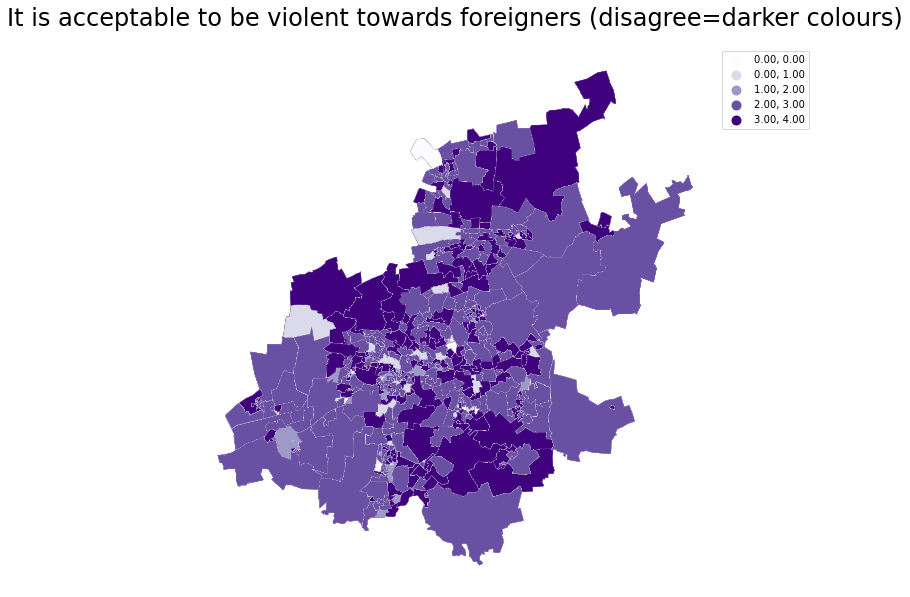

In [11]:
ax=wards_mer_foreigners_web_mercator.plot(figsize=(12,10),
                 column='violence_foreigners_x',
                 legend=True,
                 scheme='NaturalBreaks',
              cmap='Purples', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('It is acceptable to be violent towards foreigners (disagree=darker colours)',fontsize=24, pad=20)

# add a basemap
#ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

## Mapping BW trust variable

I will now do the same for the BW trust variable

In [12]:
BW_trust = wards_mer['Q9_10_BW_trust'].value_counts()

In [13]:
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Strongly disagree','BW_trust']=0
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Disagree','BW_trust']=1
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Neither agree nor disagree','BW_trust']=2
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Agree','BW_trust']=3
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Strongly agree','BW_trust']=4
wards_mer [['Q9_10_BW_trust','BW_trust']]

,Q9_10_BW_trust,BW_trust
0,Strongly agree,4.0
1,Strongly agree,4.0
2,Agree,3.0
3,Strongly agree,4.0
4,Agree,3.0
...,...,...
24884,Strongly agree,4.0
24885,Agree,3.0
24886,Strongly agree,4.0
24887,Agree,3.0


In [14]:
#create ward level dataset with ward average bw_trust variable
wards_mer_bw = wards_mer.groupby("WardID").mean('BW_trust') [["BW_trust"]]

wards_mer_bw.head()

,BW_trust
WardID,
74201001,2.055556
74201002,2.000000
74201003,1.911765
74201004,2.382353
74201005,2.161290


In [15]:
wards_mer_bw = wards_mer.merge(wards_mer_bw, on='WardID')

wards_mer_bw.head()

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q11_14_unemployment_status,Q12_03_day,Q12_04_night,Q15_02_age,Q15_02_age_recode,Q15_03_registered_student,Q15_20_income,violence_foreigners,BW_trust_x,BW_trust_y
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,NaN,Bit unsafe,Very unsafe,35,35-39,No,R1 601 - R3 200,4.0,4.0,3.018182
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Yes,Very unsafe,Very unsafe,28,25-29,No,R6 401 - R12 800,4.0,4.0,3.018182
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,Fairly safe,Bit unsafe,62,60-64,No,R1 601 - R3 200,2.0,3.0,3.018182
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,NaN,Neither safe nor unsafe,Very unsafe,25,25-29,No,R3 201 - R6 400,4.0,4.0,3.018182
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Yes,Fairly safe,Fairly safe,47,45-49,No,Respondent refused,3.0,3.0,3.018182


## Now plotting it....
I wanted to use web mercator, but it kept on crashing. So instead I chose to do a more basic map. I will try to recreate this using some of the more advanced functions we have learnt. 

<AxesSubplot:>

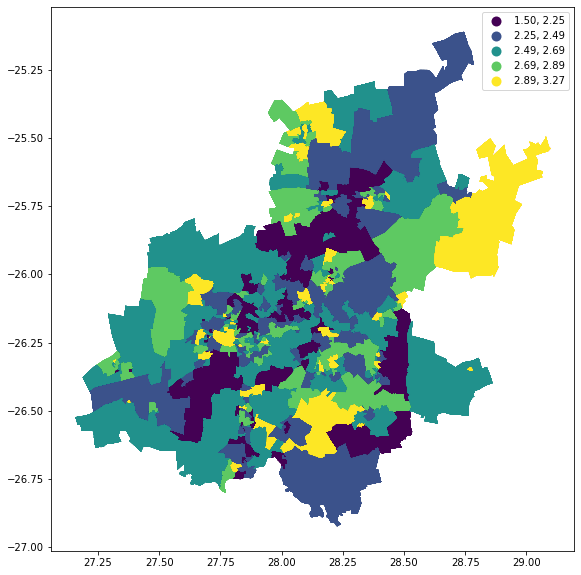

In [16]:
wards_mer_bw.plot(figsize=(12,10),
                 column='BW_trust_y',
                 legend=True, 
                 scheme='NaturalBreaks')

## Conclusions 

In this map we can see that most people agree with the statement that black and whites will never really trust each other. 